In [1]:
# Load the data set and unzip it.
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
# Extract Zip file
import zipfile
zip_path = '/content/drive/MyDrive/Data_Snakes.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [3]:
# Convert class names to numerical values 1 and 0

generator = ImageDataGenerator().flow_from_directory(
    '/content/Data_Snakes/train_all',
    classes=['nonVenom', 'venomous'],
    class_mode='binary',
    shuffle=False
)

print("Class indices:", generator.class_indices)

Found 8281 images belonging to 2 classes.
Class indices: {'nonVenom': 0, 'venomous': 1}


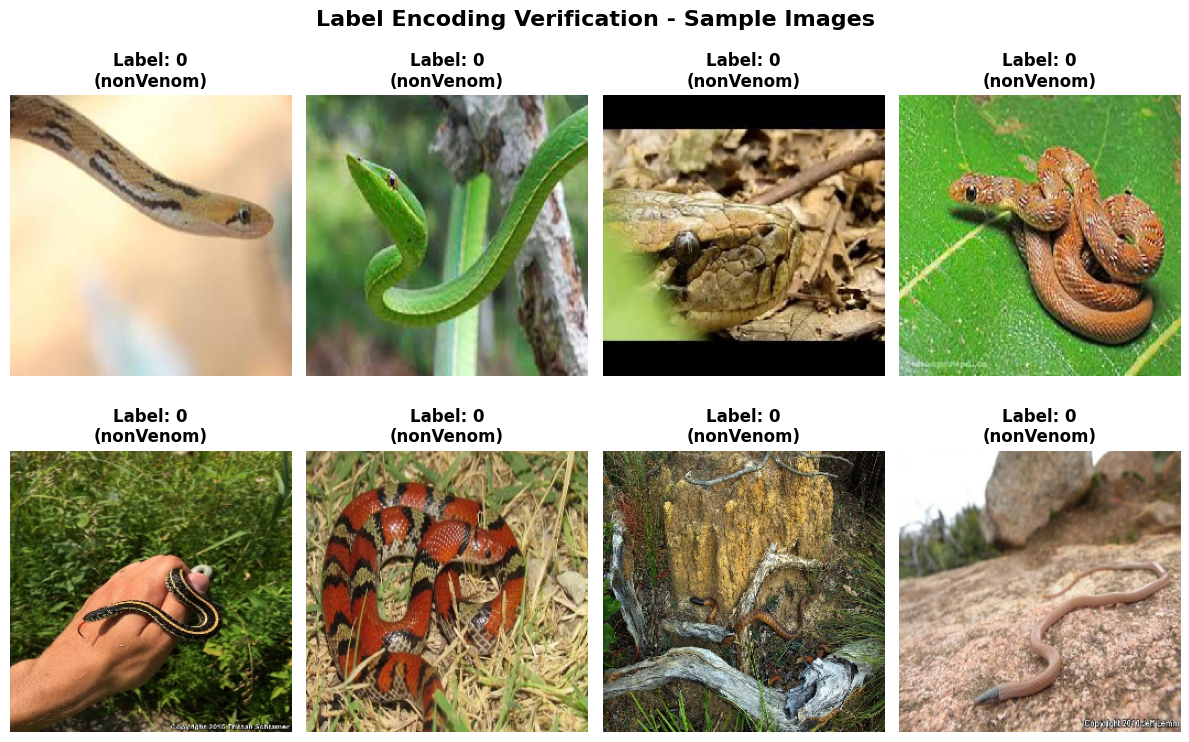

In [4]:
# EDA visualization- Label encoing verification
sample_images, sample_labels = next(generator)
idx_to_class = {v: k for k, v in generator.class_indices.items()}

plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(sample_images[i].astype('uint8'))  # cast to 0-255 integers
    label = int(sample_labels[i])
    class_name = idx_to_class[label]
    plt.title(f"Label: {label}\n({class_name})", fontweight='bold')
    plt.axis('off')

plt.suptitle('Label Encoding Verification - Sample Images', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()